In [2]:
# Read Datasets

In [19]:
## MNIST (image)

In [7]:
import torchvision
import torchvision.transforms as transforms
import torch
import numpy as np

# Define a transform to use the original range (0-1 after ToTensor)
transform = transforms.Compose([
    transforms.ToTensor() # Converts to [0, 1] range by default for images
])

# Load the training and test MNIST datasets with the transform applied
train_dataset = torchvision.datasets.MNIST(root='./data_mnist', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data_mnist', train=False, download=True, transform=transform)

# Extract images and labels into X_train, y_train, X_test, y_test NumPy arrays

X_train = torch.stack([img for img, _ in train_dataset]).numpy()
y_train = np.array([label for _, label in train_dataset])

X_test = torch.stack([img for img, _ in test_dataset]).numpy()
y_test = np.array([label for _, label in test_dataset])

print(f"MNIST training data loaded: {len(y_train)} samples")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"MNIST test data loaded: {len(y_test)} samples")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

MNIST training data loaded: 60000 samples
X_train shape: (60000, 1, 28, 28)
y_train shape: (60000,)
MNIST test data loaded: 10000 samples
X_test shape: (10000, 1, 28, 28)
y_test shape: (10000,)


In [8]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Initialize lists to store sampled images and labels
sampled_X_train = []
sampled_y_train = []

# Iterate through each digit from 0 to 9
for digit in range(10):
    # Find indices where the label matches the current digit
    digit_indices = np.where(y_train == digit)[0]

    # Randomly select 10 indices for the current digit
    selected_indices = np.random.choice(digit_indices, 10, replace=False)

    # Append the selected images and labels to the sample lists
    sampled_X_train.append(X_train[selected_indices])
    sampled_y_train.append(y_train[selected_indices])

# Concatenate the lists to form the final sampled arrays
sampled_X_train = np.concatenate(sampled_X_train, axis=0)
sampled_y_train = np.concatenate(sampled_y_train, axis=0)

print(f"Sampled training data created: {len(sampled_y_train)} samples")
print(f"sampled_X_train shape: {sampled_X_train.shape}")
print(f"sampled_y_train shape: {sampled_y_train.shape}")

Sampled training data created: 100 samples
sampled_X_train shape: (100, 1, 28, 28)
sampled_y_train shape: (100,)


In [9]:
sampled_X_train

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]

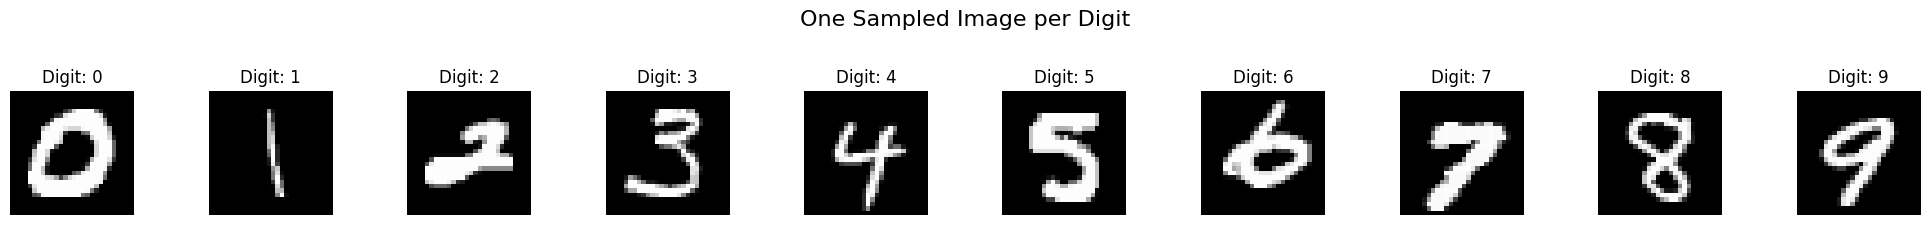

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 10, figsize=(20, 2))

for digit in range(10):
    # Find the index of the first occurrence of the current digit in sampled_y_train
    # np.where returns a tuple, we need the first element (array of indices)
    # and then the first index from that array
    idx = np.where(sampled_y_train == digit)[0][0]

    # Get the image corresponding to this digit
    image = sampled_X_train[idx]

    # MNIST images are 1 channel (grayscale), so we squeeze the channel dimension
    image = image.squeeze()

    axes[digit].imshow(image, cmap='gray')
    axes[digit].set_title(f'Digit: {digit}')
    axes[digit].axis('off') # Hide axes for cleaner display

plt.suptitle('One Sampled Image per Digit', y=1.1, fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
image_mnist_X_sample = sampled_X_train
image_mnist_y_sample = sampled_y_train

In [52]:
## Audio MNIST (kaggle dataset)
# https://www.kaggle.com/datasets/sripaadsrinivasan/audio-mnist

In [ ]:
### Download Audio MNIST dataset
#!/bin/bash
!curl -L -o audio-mnist.zip https://www.kaggle.com/api/v1/datasets/download/sripaadsrinivasan/audio-mnist
!mkdir data_audio_mnist
!unzip audio-mnist.zip -d data_audio_mnist

In [24]:
# Leitura da base de dados - Audio MNIST
import os
import pandas as pd

BASE_PATH = "./data_audio_mnist"

def index_audio_mnist(base_path: str = BASE_PATH) -> pd.DataFrame:
    """
    Percorre o diretório base e devolve um DataFrame com:
    - filepath: caminho completo do .wav
    - digit: dígito falado (0-9)
    - speaker: id/nome do locutor
    - instance: índice da gravação
    """
    filepaths = []
    digits = []
    speakers = []
    instances = []

    for root, _, files in os.walk(base_path):
        for fname in files:
            if not fname.lower().endswith(".wav"):
                continue

            # espera padrão: digit_speaker_instance.wav
            name = fname[:-4]  # remove ".wav"
            parts = name.split("_")
            if len(parts) != 3:
                # se algo estiver fora do padrão, apenas ignora
                # você pode dar um print se quiser depurar
                # print("Nome inesperado:", fname)
                continue

            digit_str, speaker_str, instance_str = parts

            filepaths.append(os.path.join(root, fname))
            digits.append(int(digit_str))
            speakers.append(speaker_str)
            instances.append(int(instance_str))

    df = pd.DataFrame({
        "filepath": filepaths,
        "digit": digits,
        "speaker": speakers,
        "instance": instances,
    })

    return df

# Exemplo de uso
df = index_audio_mnist()
print(df.head())
print("Total de amostras:", len(df))
print("Dígitos únicos:", sorted(df["digit"].unique()))
print("Nº de speakers:", df["speaker"].nunique())

                                 filepath  digit speaker  instance
0  ./data_audio_mnist/data/08/6_08_27.wav      6      08        27
1  ./data_audio_mnist/data/08/2_08_22.wav      2      08        22
2  ./data_audio_mnist/data/08/6_08_48.wav      6      08        48
3   ./data_audio_mnist/data/08/5_08_3.wav      5      08         3
4   ./data_audio_mnist/data/08/4_08_0.wav      4      08         0
Total de amostras: 30000
Dígitos únicos: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
Nº de speakers: 60


In [26]:
## Read audio mnist metadata
audio_mnist_metadata = pd.read_json("./data_audio_mnist/data/audioMNIST_meta.txt")
audio_mnist_metadata = audio_mnist_metadata.T
# Ensure the speaker IDs in audio_mnist_metadata are two-digit, zero-padded strings
audio_mnist_metadata['speaker_id_padded'] = audio_mnist_metadata.index.astype(str).str.zfill(2)

In [29]:
## sample estratificado


In [30]:
sampled_dfs = []
for digit_value in range(10):
    digit_df = df[df['digit'] == digit_value]
    sampled_digit_df = digit_df.sample(n=10, random_state=42)
    sampled_dfs.append(sampled_digit_df)
sampled_audio_df = pd.concat(sampled_dfs)

# Merge the sampled_audio_df with the relevant part of audio_mnist_metadata to get gender
sampled_audio_df = pd.merge(
    sampled_audio_df,
    audio_mnist_metadata[['gender', 'speaker_id_padded']],
    left_on='speaker',
    right_on='speaker_id_padded',
    how='left'
)
# Drop the temporary speaker_id_padded column and rename 'gender' to 'speaker_gender'
sampled_audio_df = sampled_audio_df.drop(columns=['speaker_id_padded'])
sampled_audio_df = sampled_audio_df.rename(columns={'gender': 'speaker_gender'})

display(sampled_audio_df.head())
print("\nDigit distribution in sampled_audio_df:")
display(sampled_audio_df['digit'].value_counts())
print("\nSpeaker gender distribution in sampled_audio_df:")
display(sampled_audio_df['speaker_gender'].value_counts())

,filepath,digit,speaker,instance,speaker_gender
0,./data_audio_mnist/data/50/0_50_36.wav,0,50,36,male
1,./data_audio_mnist/data/53/0_53_4.wav,0,53,4,male
2,./data_audio_mnist/data/50/0_50_3.wav,0,50,3,male
3,./data_audio_mnist/data/07/0_07_43.wav,0,07,43,male
4,./data_audio_mnist/data/02/0_02_29.wav,0,02,29,male



Digit distribution in sampled_audio_df:


,count
digit,
0,10
1,10
2,10
3,10
4,10
5,10
6,10
7,10
8,10



Speaker gender distribution in sampled_audio_df:


,count
speaker_gender,
male,80
female,20


In [34]:
audio_mnist_X_sample_paths = sampled_audio_df['filepath'].values
audio_mnist_y_sample = sampled_audio_df['digit'].values

In [55]:
## (simple) Text MNIST

In [93]:
def digit_to_text_data(n: int) -> str:
    if not 0 <= n <= 9:
        raise ValueError("O número deve estar entre 0 e 9.")

    # formas por extenso
    words = ["zero","one","two","three","four","five","six","seven","eight","nine"]
    word = words[n]

    # possíveis formatos
    texts = [
        f"{n}",
        word,
        f"Number {n}",
        f"Number {word}",
        f"Digit {n}",
        f"Digit {word}",
        word.upper(),
        f"{n}",
        f"#{n}",
        f"0{n}",

    ]

    return texts

def flat_list(nested_list):
  return [item for sublist in nested_list for item in sublist]

text_mnist_X = []
for i in range(10):
    text_mnist_X.append(digit_to_text_data(i))

text_mnist_X = flat_list(text_mnist_X)
text_mnist_y = flat_list([[i]*10 for i in range(10)])

print(text_mnist_X)
print(text_mnist_y)

['0', 'zero', 'Number 0', 'Number zero', 'Digit 0', 'Digit zero', 'ZERO', '0', '#0', '00', '1', 'one', 'Number 1', 'Number one', 'Digit 1', 'Digit one', 'ONE', '1', '#1', '01', '2', 'two', 'Number 2', 'Number two', 'Digit 2', 'Digit two', 'TWO', '2', '#2', '02', '3', 'three', 'Number 3', 'Number three', 'Digit 3', 'Digit three', 'THREE', '3', '#3', '03', '4', 'four', 'Number 4', 'Number four', 'Digit 4', 'Digit four', 'FOUR', '4', '#4', '04', '5', 'five', 'Number 5', 'Number five', 'Digit 5', 'Digit five', 'FIVE', '5', '#5', '05', '6', 'six', 'Number 6', 'Number six', 'Digit 6', 'Digit six', 'SIX', '6', '#6', '06', '7', 'seven', 'Number 7', 'Number seven', 'Digit 7', 'Digit seven', 'SEVEN', '7', '#7', '07', '8', 'eight', 'Number 8', 'Number eight', 'Digit 8', 'Digit eight', 'EIGHT', '8', '#8', '08', '9', 'nine', 'Number 9', 'Number nine', 'Digit 9', 'Digit nine', 'NINE', '9', '#9', '09']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,

In [94]:
### All data shapes in summary
print('text:')
print(len(text_mnist_X))
print(len(text_mnist_y))
print('image:')
print(image_mnist_X_sample.shape)
print(image_mnist_y_sample.shape)
print('audio:')
print(audio_mnist_X_sample_paths.shape)
print(audio_mnist_y_sample.shape)

text:
100
100
image:
(100, 1, 28, 28)
(100,)
audio:
(100,)
(100,)


# ImageBind Embeddings

In [56]:
# Setup
# Recomendado (Colab / Linux / macOS)
!git clone https://github.com/facebookresearch/ImageBind.git
!pip install -U pip
!pip install -r ImageBind/requirements.txt
!pip install ImageBind/.
# Para leitura de áudio no Windows (ou se o áudio não abrir no Linux/macOS):
#!pip install soundfile

Cloning into 'ImageBind'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 181 (delta 81), reused 50 (delta 50), pack-reused 67 (from 3)
Receiving objects: 100% (181/181), 2.65 MiB | 25.60 MiB/s, done.
Resolving deltas: 100% (89/89), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision 6cdc929315aab1b5674b6dcf73b16ec99147735f) to /tmp/pip-install-k3lxjlc6/pytorchvideo_632ad8c3c9e94b35ae882314494bc390
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-install-k3lxjlc6/pytorchvideo_632ad8c3c9e94b35ae882314494bc390
  Running command git rev-parse -q --verify 'sha^6cdc929315aab1

In [57]:
import torch
from pathlib import Path

from imagebind import data
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# 1) Carrega o modelo pré-treinado
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

100%|██████████| 4.47G/4.47G [01:16<00:00, 63.1MB/s]


ImageBindModel(
  (modality_preprocessors): ModuleDict(
    (vision): RGBDTPreprocessor(
      (cls_token): tensor((1, 1, 1280), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Sequential(
          (0): PadIm2Video()
          (1): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
      )
      (pos_embedding_helper): SpatioTemporalPosEmbeddingHelper(
        (pos_embed): tensor((1, 257, 1280), requires_grad=True)
        
      )
    )
    (text): TextPreprocessor(
      (pos_embed): tensor((1, 77, 1024), requires_grad=True)
      (mask): tensor((77, 77), requires_grad=False)
      
      (token_embedding): Embedding(49408, 1024)
    )
    (audio): AudioPreprocessor(
      (cls_token): tensor((1, 1, 768), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10), bias=False)
        (norm_layer): LayerNorm((768,), eps=1e-05, elementwise_affine=

In [ ]:
## ImageBind Encoder - encode_any function
### plus adjustments for MNIST like images to 224x224


In [58]:
import torch
from typing import List, Dict
from pathlib import Path
from imagebind import data
from imagebind.models.imagebind_model import ModalityType
from PIL import Image
import io
import torchvision.transforms as transforms

# Define ImageBind's vision transformation (reconstructed from their internal usage)
# ImageBind typically uses an image size of 224x224
image_size = 224

# The normalization parameters are standard for ImageBind (and many vision models)
_vision_transform_reconstructed = transforms.Compose([
    transforms.Resize(image_size, interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.CenterCrop(image_size),
    transforms.Lambda(lambda img: img.convert("RGB")), # Ensures 3 channels
    transforms.ToTensor(),
    transforms.Normalize(
        (0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)
    ),
])

def encode_any(
    model, device,
    texts: List[str] = None,
    images: List[str] | List[io.BytesIO] = None, # Can be paths or BytesIO objects
    audios: List[str] = None
) -> Dict[ModalityType, torch.Tensor]:
    inputs = {}
    if texts:
        inputs[ModalityType.TEXT] = data.load_and_transform_text(texts, device)
    if images:
        vision_outputs = []
        # Check if the input is a list of file paths (str or Path) or BytesIO/PIL Image objects
        if all(isinstance(img, (str, Path)) for img in images):
            # If all are paths, use ImageBind's default path loading
            inputs[ModalityType.VISION] = data.load_and_transform_vision_data(images, device)
        else:
            # If there are BytesIO or PIL Image objects, process them manually
            for img_input in images:
                if isinstance(img_input, io.BytesIO):
                    pil_img = Image.open(img_input).convert("RGB")
                    transformed_img = _vision_transform_reconstructed(pil_img).to(device)
                    vision_outputs.append(transformed_img)
                elif isinstance(img_input, Image.Image):
                    transformed_img = _vision_transform_reconstructed(img_input).to(device)
                    vision_outputs.append(transformed_img)
                else:
                    raise ValueError("Unsupported image input type. Expected file path, BytesIO, or PIL Image.")
            inputs[ModalityType.VISION] = torch.stack(vision_outputs, dim=0)

    if audios:
        inputs[ModalityType.AUDIO] = data.load_and_transform_audio_data(audios, device)
    with torch.no_grad():
        embs = model(inputs)
        for k in embs:
            embs[k] = torch.nn.functional.normalize(embs[k], dim=-1)
    return embs

In [72]:
def topk_retrieval(query: torch.Tensor, gallery: torch.Tensor, k: int = 3):
    # query: [Nq, D], gallery: [Ng, D] (ambos normalizados)
    sims = query @ gallery.T  # cos-sim se normalizados
    vals, idxs = sims.topk(k, dim=-1)
    return vals, idxs

In [59]:
import io
from PIL import Image
import numpy as np

def numpy_image_to_bytesio(numpy_image_array):
    """
    Converts a single (1, H, W) NumPy image array (normalized [-1, 1])
    to a BytesIO object containing a PNG image.
    """
    # Squeeze the channel dimension (1, 28, 28) -> (28, 28)
    img_2d = numpy_image_array.squeeze(0)

    # Denormalize from [-1, 1] to [0, 255] and convert to uint8
    img_scaled = ((img_2d * 0.5 + 0.5) * 255).astype(np.uint8)

    # Create a PIL Image from the NumPy array (mode='L' for grayscale)
    pil_img = Image.fromarray(img_scaled, mode='L')

    # Save the PIL image to a BytesIO object as PNG
    byte_io = io.BytesIO()
    pil_img.save(byte_io, format='PNG')
    byte_io.seek(0) # Rewind to the beginning of the stream
    return byte_io



In [99]:
### Generate embedings - ImageBind
# Convert selected MNIST images from NumPy arrays to BytesIO objects
#images = [numpy_image_to_bytesio(img_array) for img_array in image_mnist_X_sample]
_num_samples = 100
embs = encode_any(model,
                  device,
                  texts=text_mnist_X[:_num_samples],
                  images=[numpy_image_to_bytesio(img_array) for img_array in image_mnist_X_sample][:_num_samples],
                  audios=audio_mnist_X_sample_paths.tolist()[:_num_samples]
                  )



/tmp/ipython-input-3753971417.py:17: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  pil_img = Image.fromarray(img_scaled, mode='L')
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and enco

In [ ]:
# The warning 'Large gap between audio n_frames(...) and target_length (...)'
# indicates that the audio input files are shorter than the expected length for ImageBind's audio processing.
# This means the model is padding the shorter audio clips with silence to match its internal target length.
# For short audio clips like spoken digits, this behavior is expected, but excessive padding can sometimes
# impact embedding quality. If necessary, the audio_target_length setting could be adjusted for better fit,
# but this would require more advanced customization of the ImageBind preprocessing pipeline.

In [100]:
for mode in embs.keys():
    print(f"{mode}: {embs[mode].shape}")

text: torch.Size([100, 1024])
vision: torch.Size([100, 1024])
audio: torch.Size([100, 1024])


## Embeddings visualization

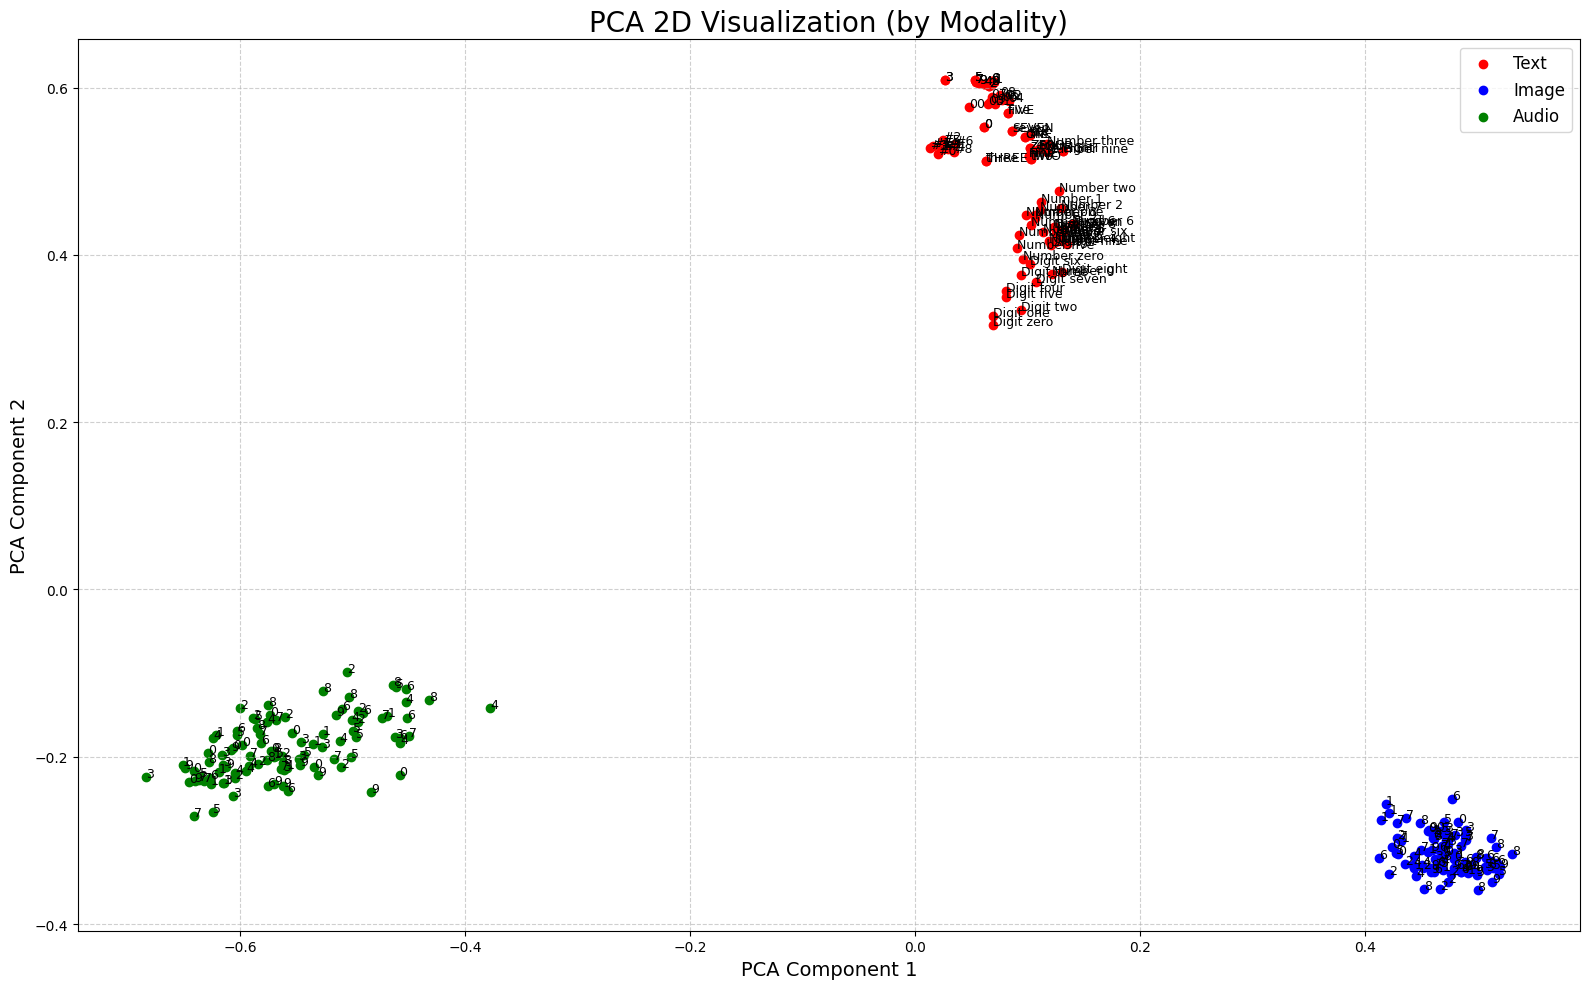

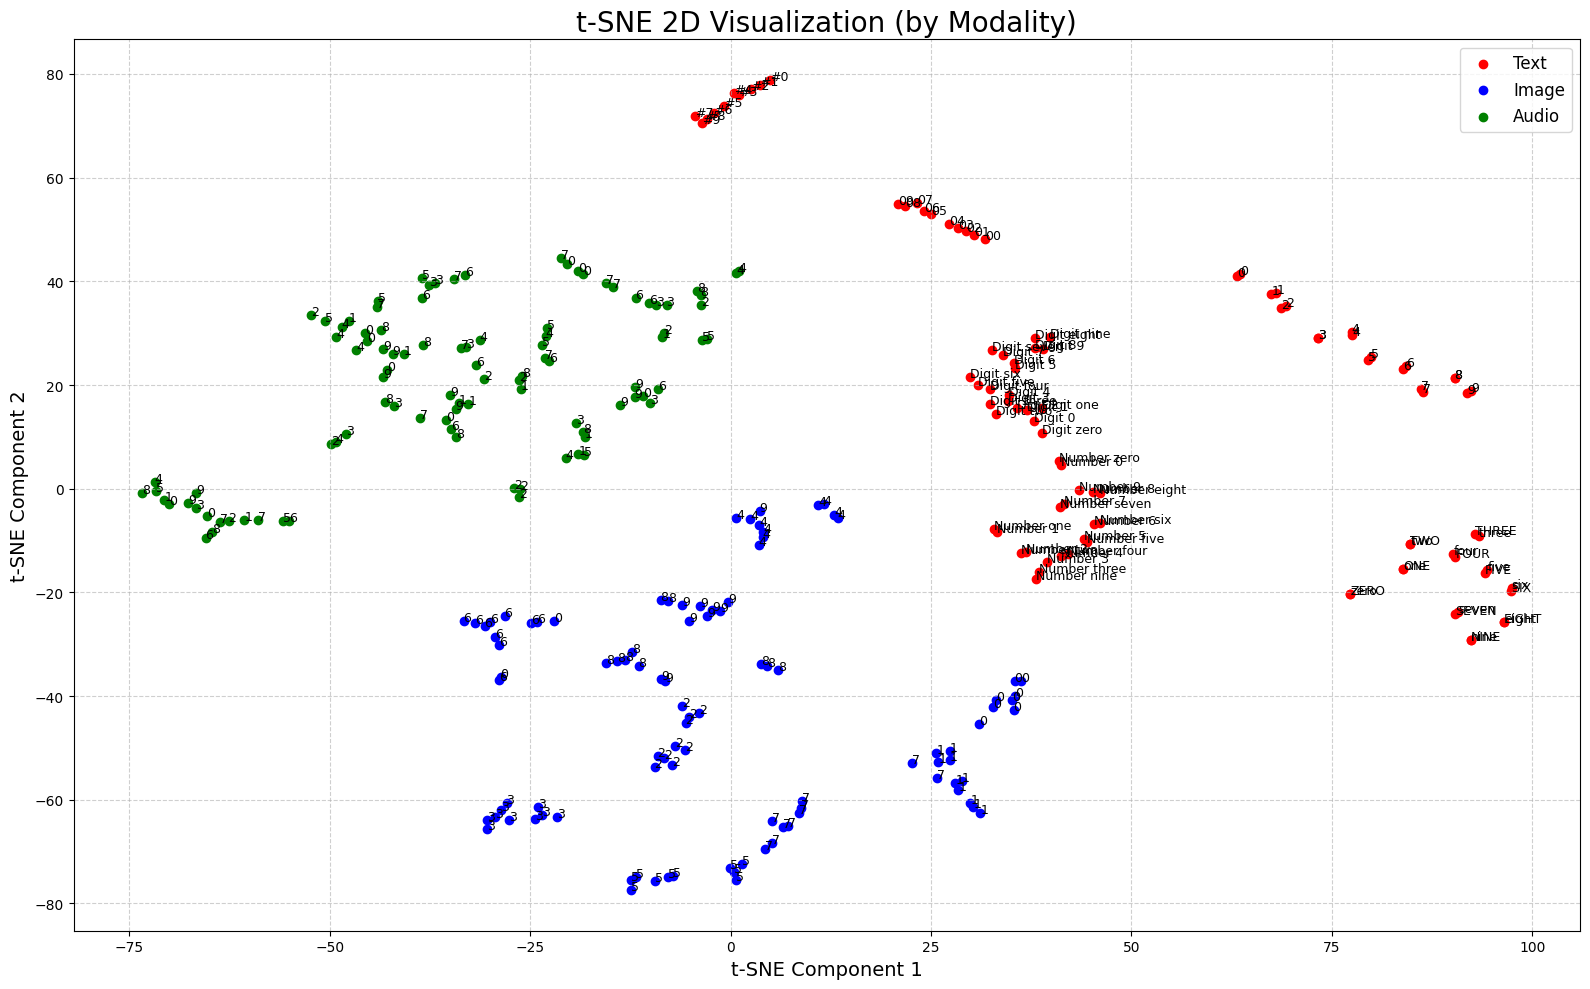

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


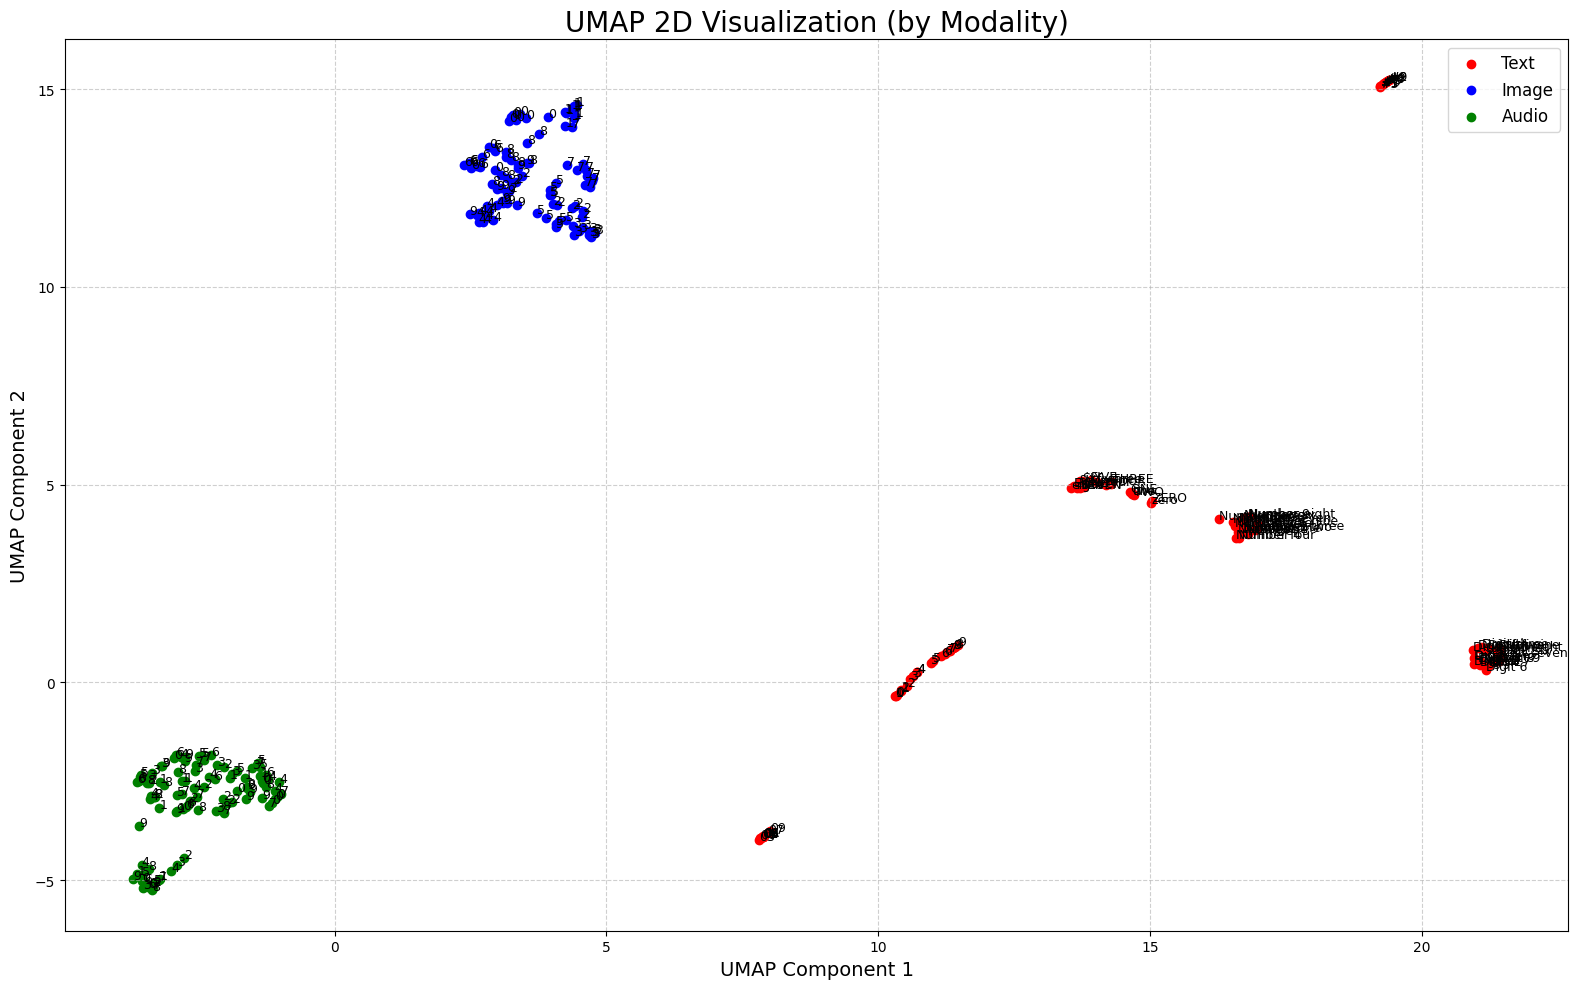

In [108]:
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
from pathlib import Path
from imagebind.models.imagebind_model import ModalityType
import numpy as np
from sklearn.decomposition import PCA

# Empilha embeddings de texto, imagem e áudio
X = torch.cat([
    embs[ModalityType.TEXT],
    embs[ModalityType.VISION],
    embs[ModalityType.AUDIO]
], dim=0).cpu().numpy()

# Prepare labels for plotting and coloring
modality_labels = (['text'] * _num_samples +
                   ['image'] * _num_samples +
                   ['audio'] * _num_samples)

# Original digit labels for annotation
digit_labels = (text_mnist_X[:_num_samples] +
                list(image_mnist_y_sample[:_num_samples].astype(str)) +
                list(audio_mnist_y_sample[:_num_samples].astype(str)))

# Define colors for each modality
colors = {'text': 'red', 'image': 'blue', 'audio': 'green'}

# PCA 2D
pca = PCA(n_components=2, random_state=0).fit_transform(X)

plt.figure(figsize=(16, 10)) # Reduced figure size
for modality in colors:
    mask = [m == modality for m in modality_labels]
    plt.scatter(pca[mask, 0], pca[mask, 1], color=colors[modality], label=modality.capitalize())
    for i, label_text in enumerate(np.array(digit_labels)[mask]):
        plt.annotate(label_text, (pca[mask, 0][i], pca[mask, 1][i]), fontsize=9)
plt.title("PCA 2D Visualization (by Modality)", fontsize=20)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# t-SNE 2D
tsne = TSNE(n_components=2, random_state=0, perplexity=3).fit_transform(X)

plt.figure(figsize=(16, 10)) # Reduced figure size
for modality in colors:
    mask = [m == modality for m in modality_labels]
    plt.scatter(tsne[mask, 0], tsne[mask, 1], color=colors[modality], label=modality.capitalize())
    for i, label_text in enumerate(np.array(digit_labels)[mask]):
        plt.annotate(label_text, (tsne[mask, 0][i], tsne[mask, 1][i]), fontsize=9)
plt.title("t-SNE 2D Visualization (by Modality)", fontsize=20)
plt.xlabel("t-SNE Component 1", fontsize=14)
plt.ylabel("t-SNE Component 2", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# UMAP 2D
reducer = umap.UMAP(random_state=0)
umap_embeddings = reducer.fit_transform(X)

plt.figure(figsize=(16, 10)) # Reduced figure size
for modality in colors:
    mask = [m == modality for m in modality_labels]
    plt.scatter(umap_embeddings[mask, 0], umap_embeddings[mask, 1], color=colors[modality], label=modality.capitalize())
    for i, label_text in enumerate(np.array(digit_labels)[mask]):
        plt.annotate(label_text, (umap_embeddings[mask, 0][i], umap_embeddings[mask, 1][i]), fontsize=9)
plt.title("UMAP 2D Visualization (by Modality)", fontsize=20)
plt.xlabel("UMAP Component 1", fontsize=14)
plt.ylabel("UMAP Component 2", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

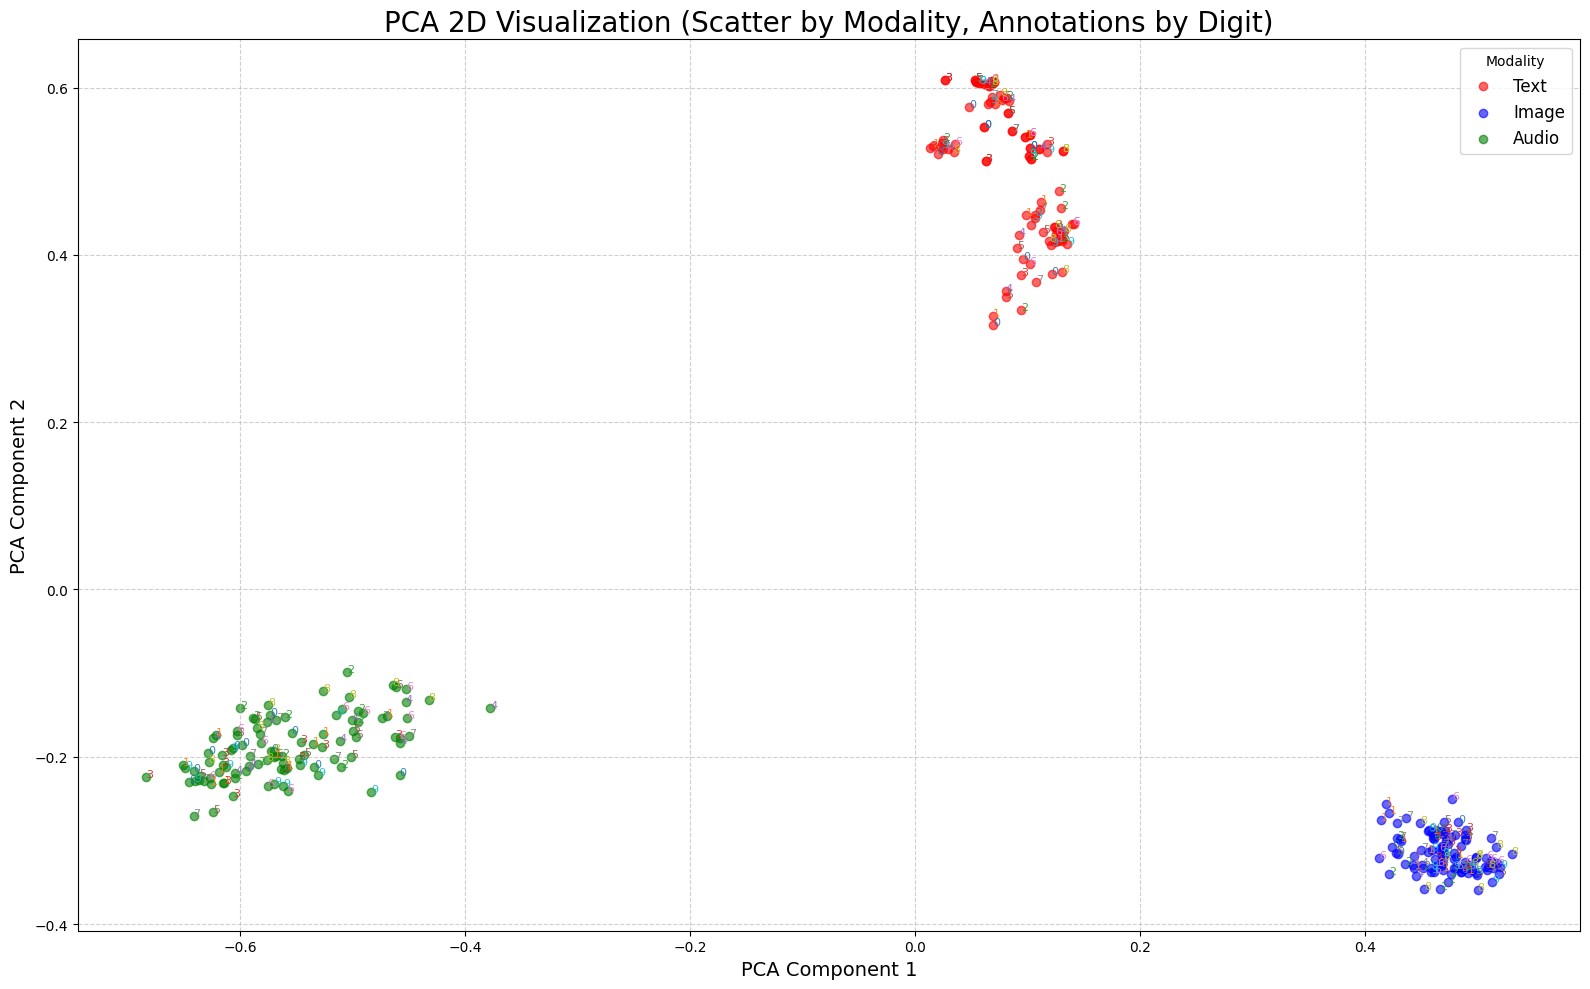

In [109]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from imagebind.models.imagebind_model import ModalityType

# Assuming X, embs, _num_samples, text_mnist_y, image_mnist_y_sample, audio_mnist_y_sample are already defined

# Prepare modality labels for coloring scatter points
modality_labels = (['text'] * _num_samples +
                   ['image'] * _num_samples +
                   ['audio'] * _num_samples)

# Prepare numeric digit labels for coloring annotations
all_digit_labels_numeric = (
    list(text_mnist_y[:_num_samples]) +
    list(image_mnist_y_sample[:_num_samples]) +
    list(audio_mnist_y_sample[:_num_samples])
)

# Define colors for modalities (for scatter points)
modality_colors_map = {'text': 'red', 'image': 'blue', 'audio': 'green'}

# Define 10-level color palette for digits (for annotations)
digit_cmap = plt.get_cmap('tab10')

# PCA 2D
pca = PCA(n_components=2, random_state=0).fit_transform(X)

plt.figure(figsize=(16, 10))
plt.title("PCA 2D Visualization (Scatter by Modality, Annotations by Digit)", fontsize=20)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Plot and annotate each modality
for mod_idx, modality in enumerate(['text', 'image', 'audio']):
    mod_mask = np.array(modality_labels) == modality

    # Scatter points for this modality, colored by modality
    plt.scatter(pca[mod_mask, 0], pca[mod_mask, 1],
                color=modality_colors_map[modality],
                label=modality.capitalize(),
                alpha=0.6)

    # Annotate points with digit, colored by digit
    for i, idx in enumerate(np.where(mod_mask)[0]): # Iterate over original indices for this modality
        digit_val = all_digit_labels_numeric[idx]
        plt.annotate(str(digit_val),
                     (pca[idx, 0], pca[idx, 1]),
                     fontsize=8,
                     color=digit_cmap(digit_val),
                     alpha=0.9)

plt.legend(fontsize=12, title="Modality")
plt.tight_layout()
plt.show()

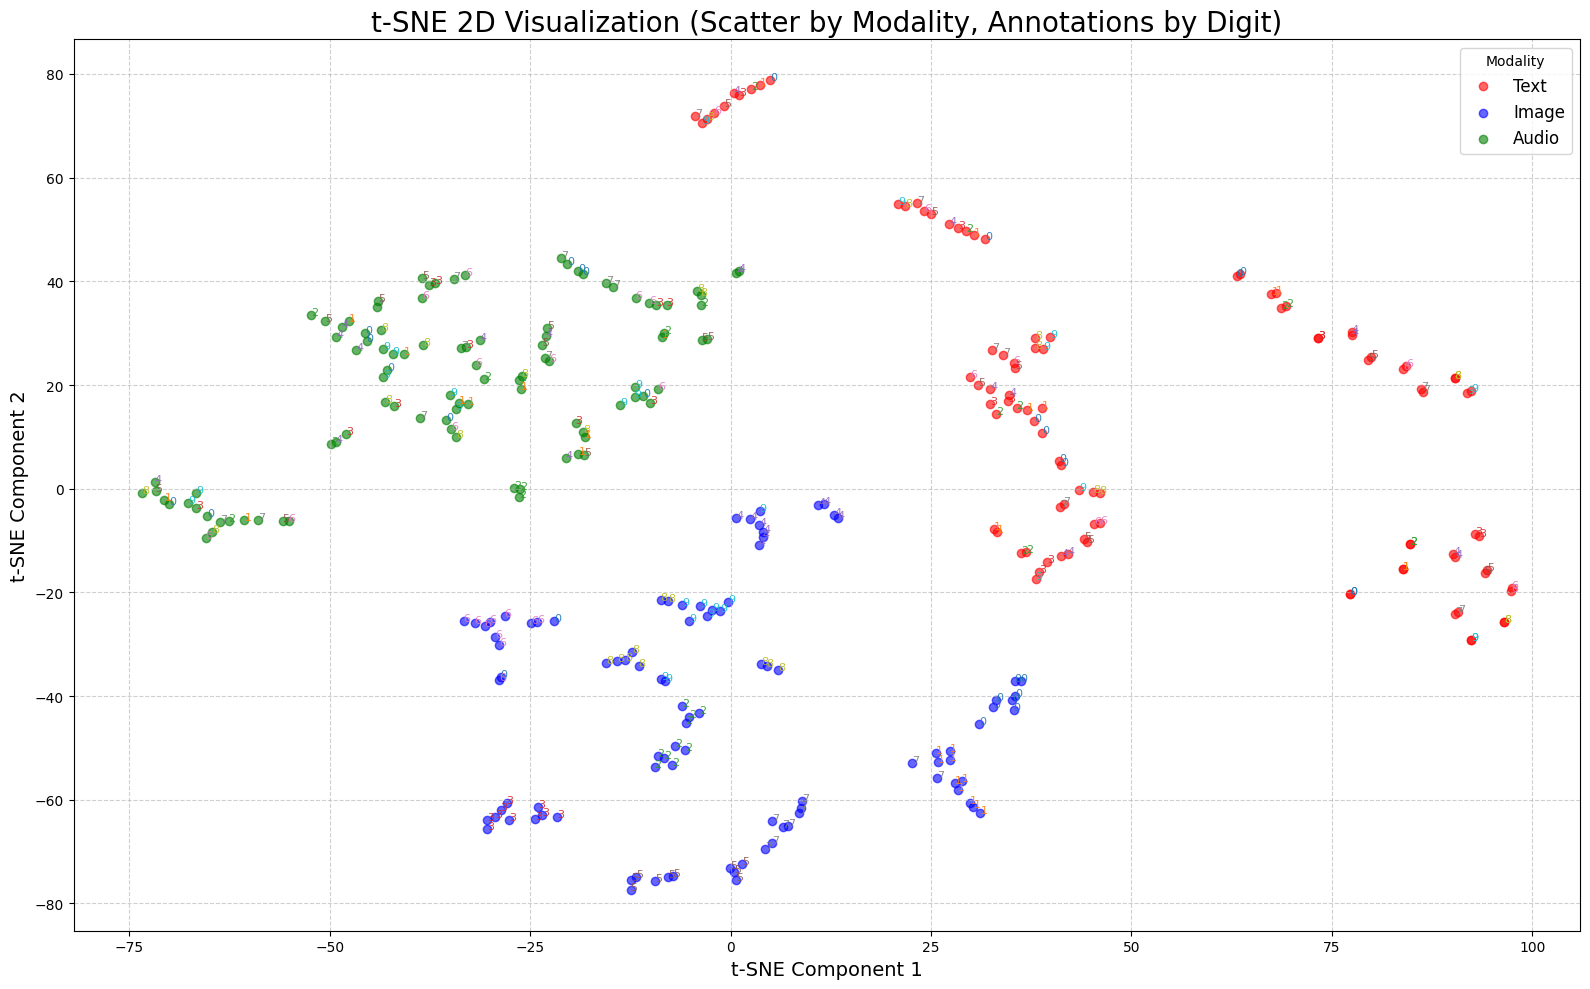

In [110]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from imagebind.models.imagebind_model import ModalityType

# Assuming X, embs, _num_samples, text_mnist_y, image_mnist_y_sample, audio_mnist_y_sample are already defined
# and modality_labels, all_digit_labels_numeric, modality_colors_map, digit_cmap are prepared from the previous cell.

# t-SNE 2D
tsne = TSNE(n_components=2, random_state=0, perplexity=3).fit_transform(X)

plt.figure(figsize=(16, 10))
plt.title("t-SNE 2D Visualization (Scatter by Modality, Annotations by Digit)", fontsize=20)
plt.xlabel("t-SNE Component 1", fontsize=14)
plt.ylabel("t-SNE Component 2", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Plot and annotate each modality
for mod_idx, modality in enumerate(['text', 'image', 'audio']):
    mod_mask = np.array(modality_labels) == modality

    # Scatter points for this modality, colored by modality
    plt.scatter(tsne[mod_mask, 0], tsne[mod_mask, 1],
                color=modality_colors_map[modality],
                label=modality.capitalize(),
                alpha=0.6)

    # Annotate points with digit, colored by digit
    for i, idx in enumerate(np.where(mod_mask)[0]):
        digit_val = all_digit_labels_numeric[idx]
        plt.annotate(str(digit_val),
                     (tsne[idx, 0], tsne[idx, 1]),
                     fontsize=8,
                     color=digit_cmap(digit_val),
                     alpha=0.9)

plt.legend(fontsize=12, title="Modality")
plt.tight_layout()
plt.show()

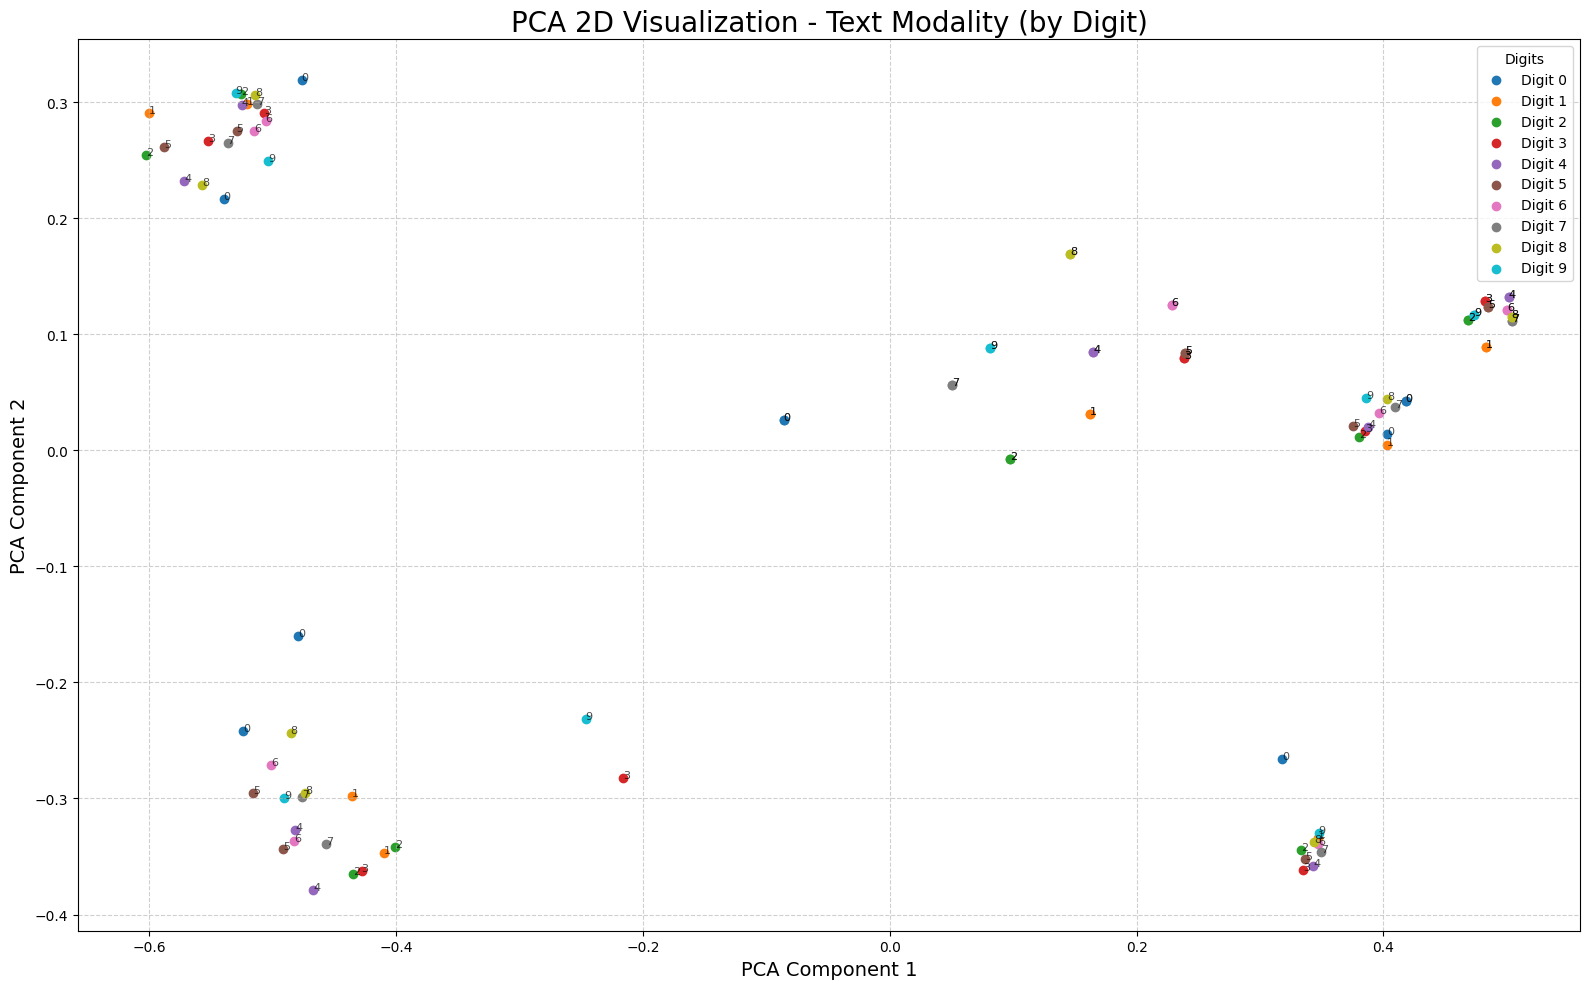

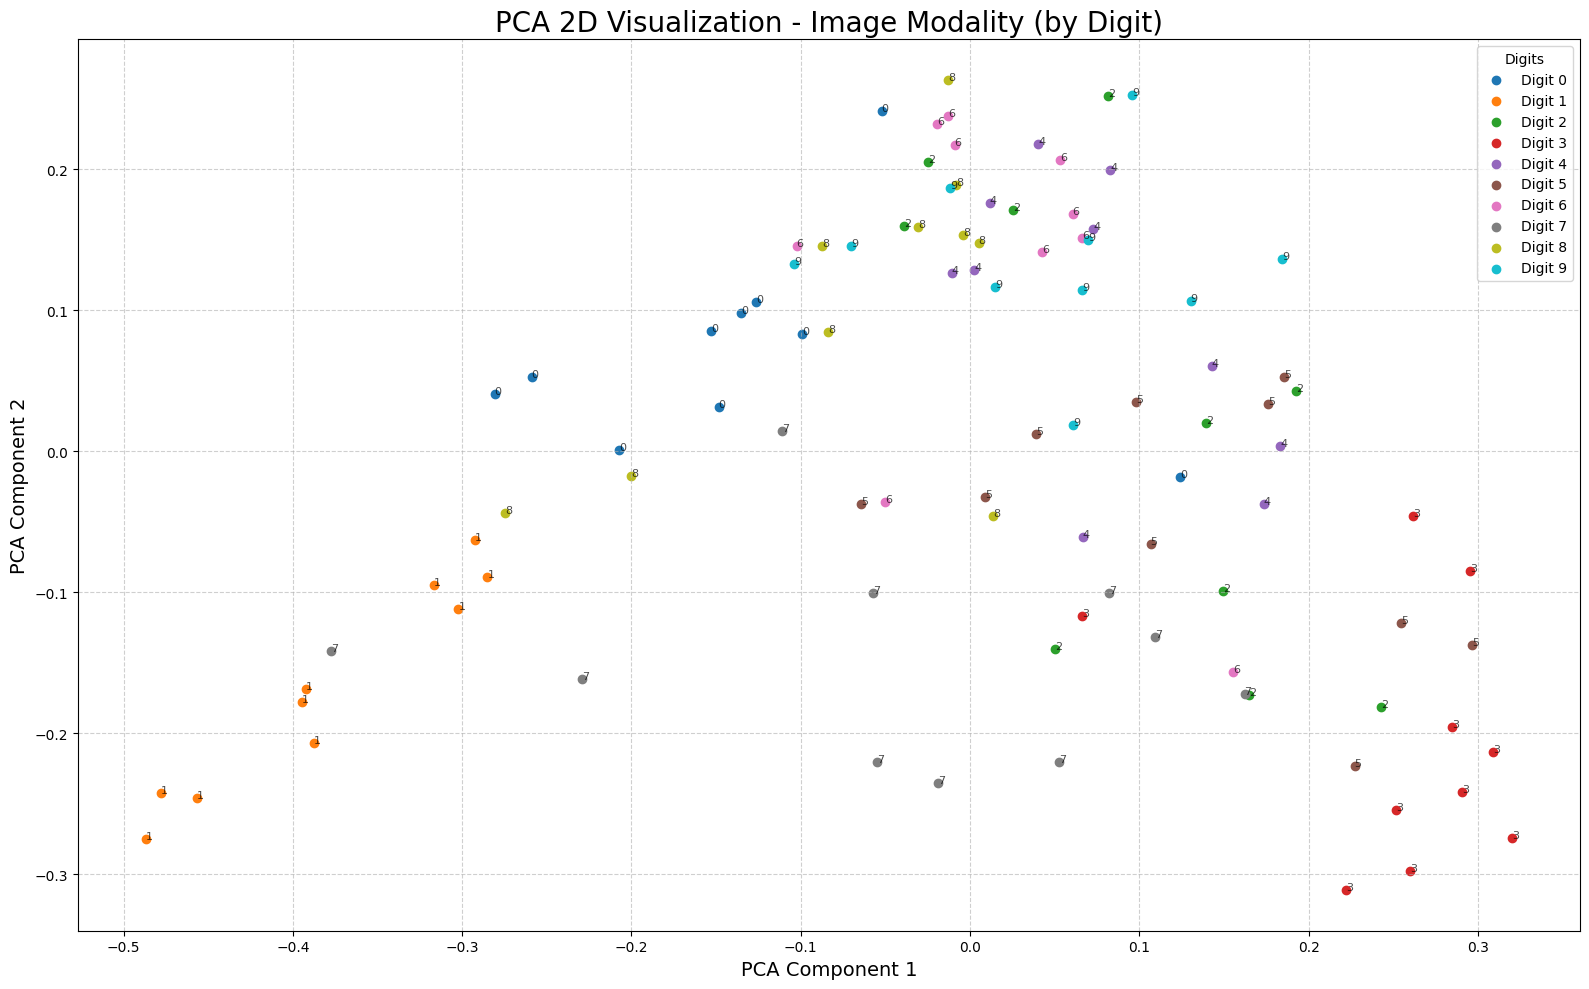

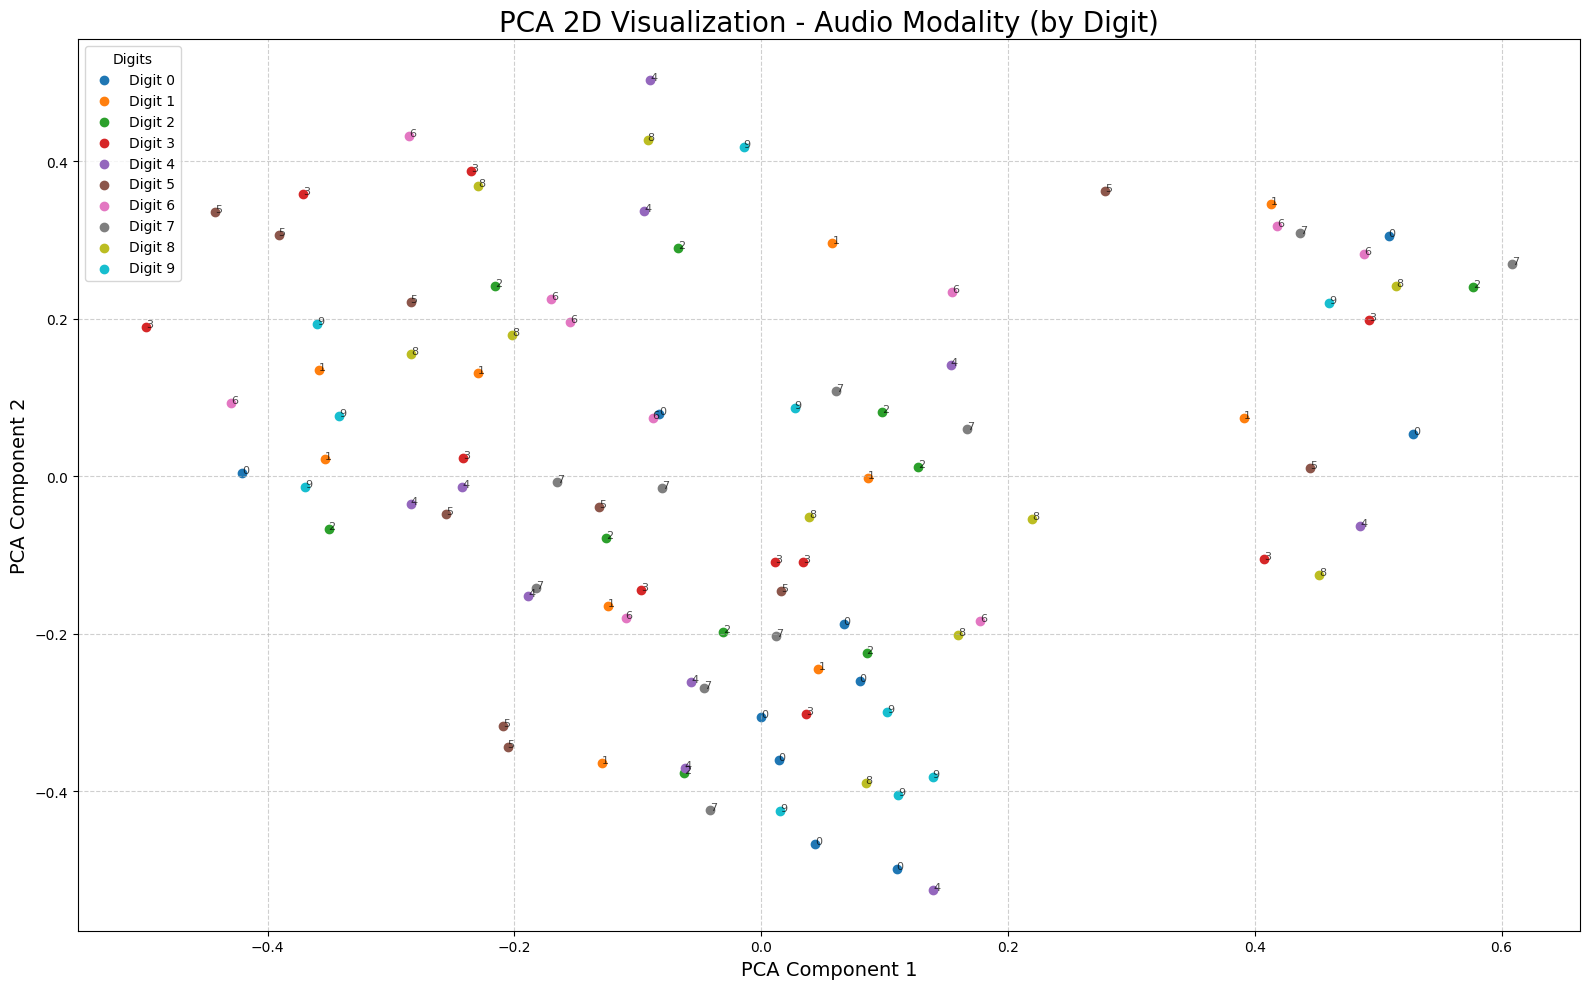

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import torch
from imagebind.models.imagebind_model import ModalityType

# Define a 10-level color palette for digits
digit_cmap = plt.get_cmap('tab10')

# --- PCA Plots (by Modality) ---

# PCA for Text Embeddings
X_text = embs[ModalityType.TEXT].cpu().numpy()
y_text = text_mnist_y[:_num_samples]
pca_text = PCA(n_components=2, random_state=0).fit_transform(X_text)

plt.figure(figsize=(16, 10))
plt.title("PCA 2D Visualization - Text Modality (by Digit)", fontsize=20)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
for digit_value in range(10):
    mask = np.array(y_text) == digit_value
    plt.scatter(pca_text[mask, 0], pca_text[mask, 1], color=digit_cmap(digit_value), label=f'Digit {digit_value}')
    for i, (x_coord, y_coord) in enumerate(pca_text[mask]):
        plt.annotate(str(digit_value), (x_coord, y_coord), fontsize=8, alpha=0.7)
plt.legend(fontsize=10, title="Digits")
plt.tight_layout()
plt.show()

# PCA for Image Embeddings
X_image = embs[ModalityType.VISION].cpu().numpy()
y_image = image_mnist_y_sample[:_num_samples]
pca_image = PCA(n_components=2, random_state=0).fit_transform(X_image)

plt.figure(figsize=(16, 10))
plt.title("PCA 2D Visualization - Image Modality (by Digit)", fontsize=20)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
for digit_value in range(10):
    mask = np.array(y_image) == digit_value
    plt.scatter(pca_image[mask, 0], pca_image[mask, 1], color=digit_cmap(digit_value), label=f'Digit {digit_value}')
    for i, (x_coord, y_coord) in enumerate(pca_image[mask]):
        plt.annotate(str(digit_value), (x_coord, y_coord), fontsize=8, alpha=0.7)
plt.legend(fontsize=10, title="Digits")
plt.tight_layout()
plt.show()

# PCA for Audio Embeddings
X_audio = embs[ModalityType.AUDIO].cpu().numpy()
y_audio = audio_mnist_y_sample[:_num_samples]
pca_audio = PCA(n_components=2, random_state=0).fit_transform(X_audio)

plt.figure(figsize=(16, 10))
plt.title("PCA 2D Visualization - Audio Modality (by Digit)", fontsize=20)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
for digit_value in range(10):
    mask = np.array(y_audio) == digit_value
    plt.scatter(pca_audio[mask, 0], pca_audio[mask, 1], color=digit_cmap(digit_value), label=f'Digit {digit_value}')
    for i, (x_coord, y_coord) in enumerate(pca_audio[mask]):
        plt.annotate(str(digit_value), (x_coord, y_coord), fontsize=8, alpha=0.7)
plt.legend(fontsize=10, title="Digits")
plt.tight_layout()
plt.show()

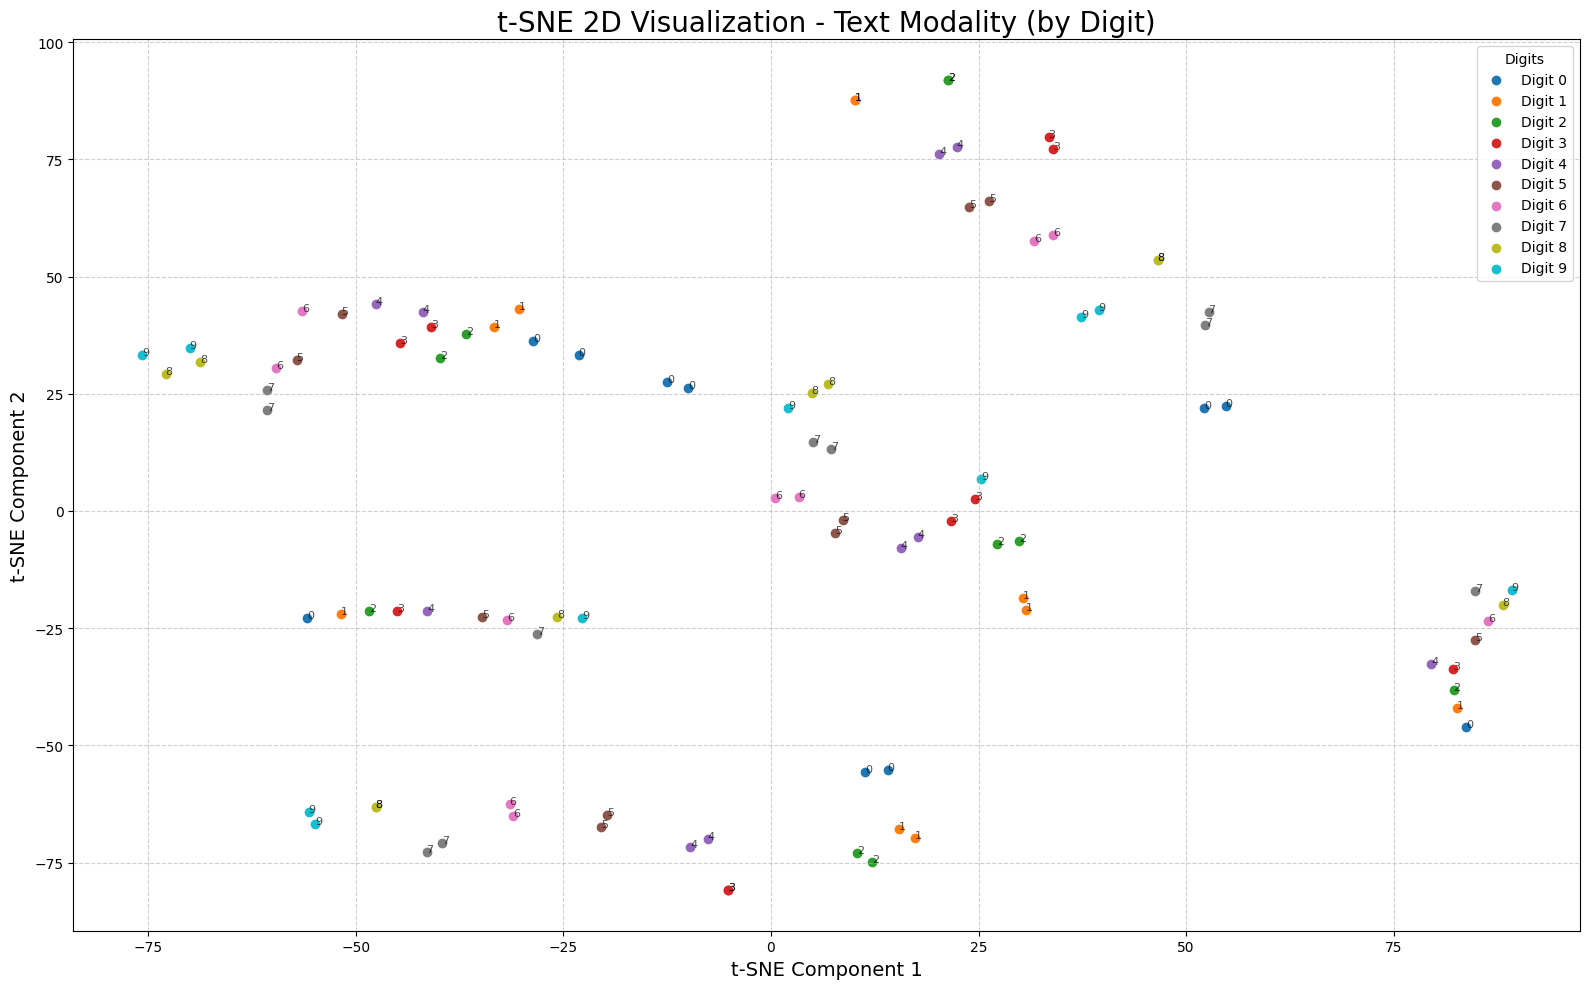

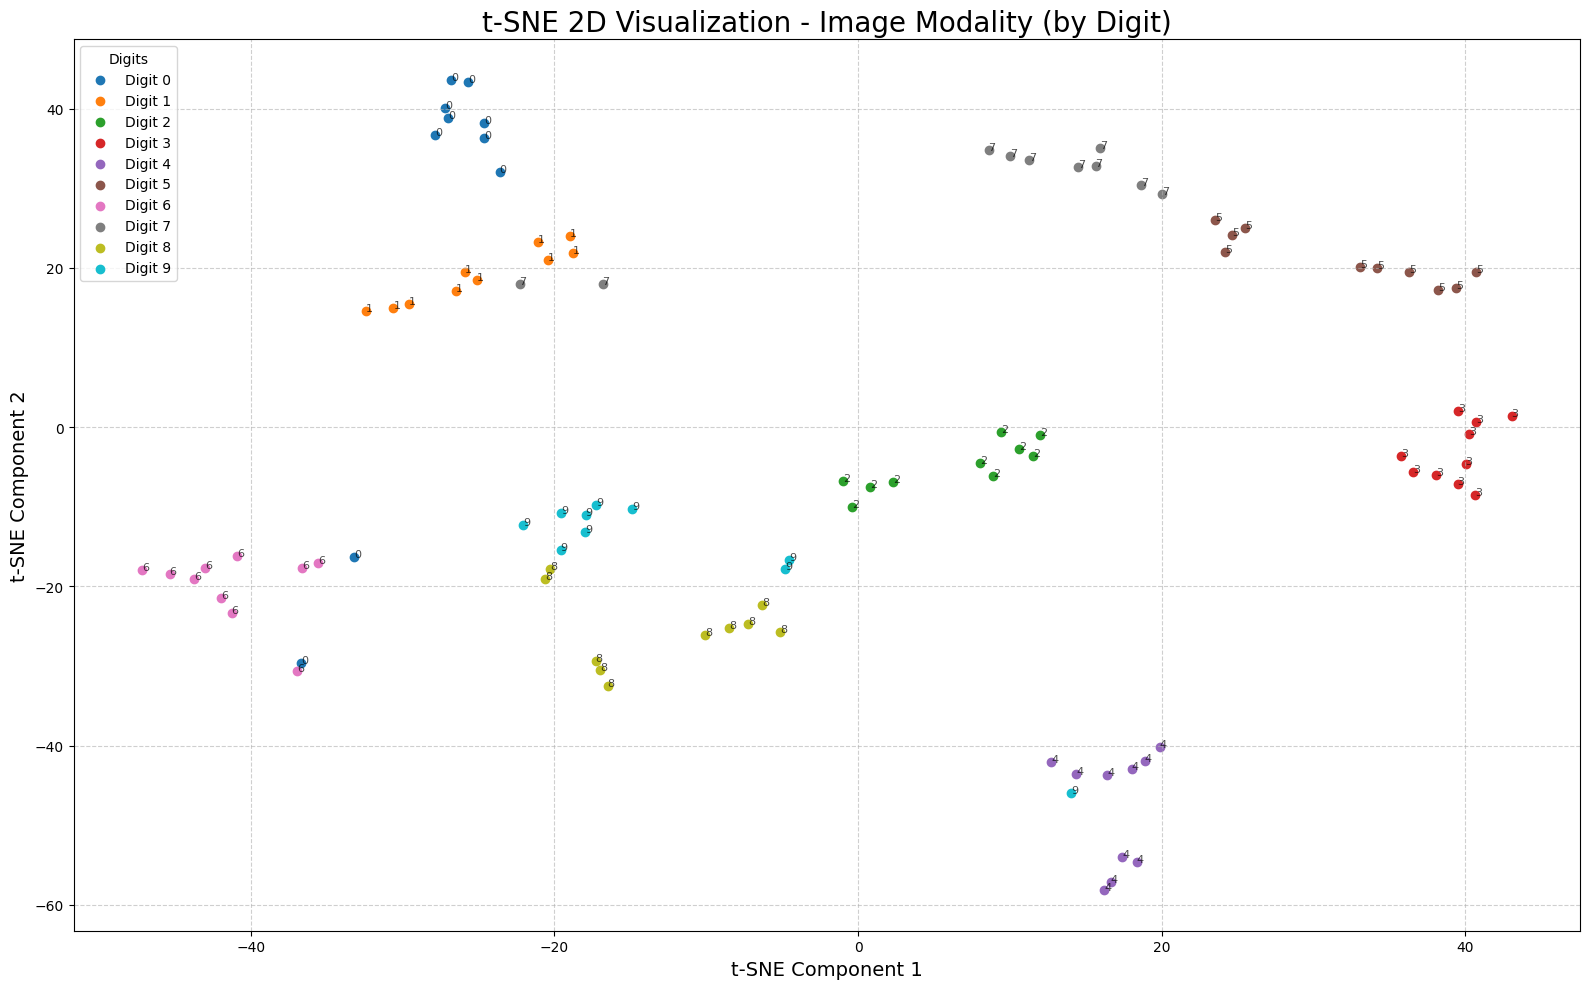

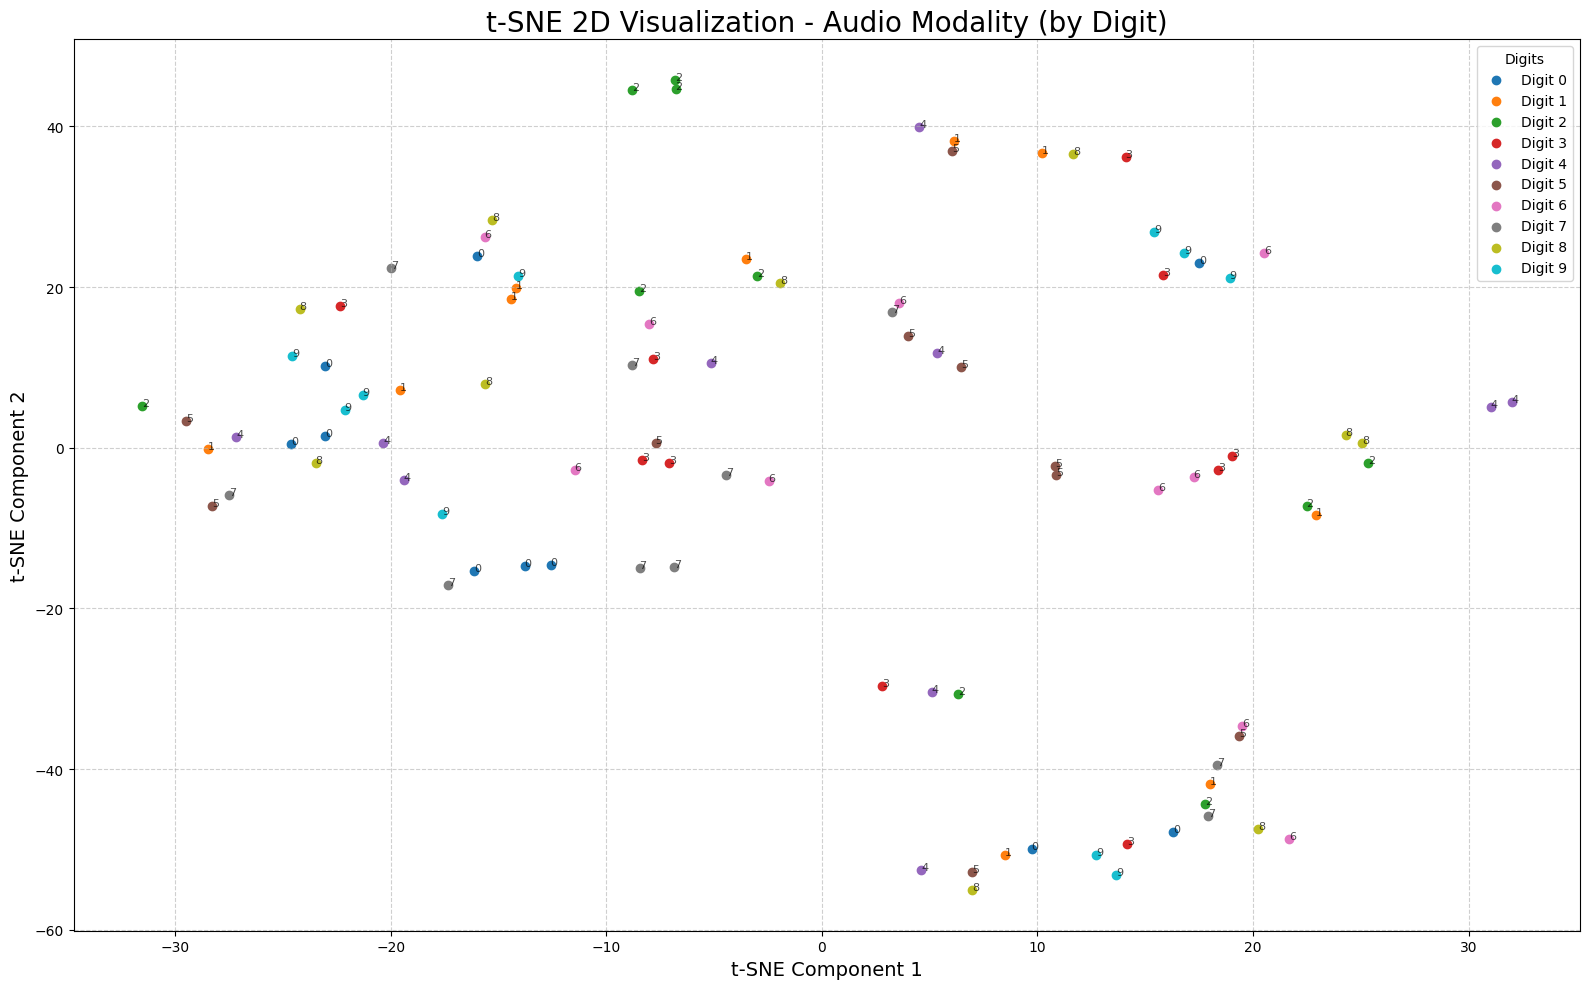

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch
from imagebind.models.imagebind_model import ModalityType

# Define a 10-level color palette for digits
digit_cmap = plt.get_cmap('tab10')

# --- t-SNE Plots (by Modality) ---

# t-SNE for Text Embeddings
X_text = embs[ModalityType.TEXT].cpu().numpy()
y_text = text_mnist_y[:_num_samples]
tsne_text = TSNE(n_components=2, random_state=0, perplexity=3).fit_transform(X_text)

plt.figure(figsize=(16, 10))
plt.title("t-SNE 2D Visualization - Text Modality (by Digit)", fontsize=20)
plt.xlabel("t-SNE Component 1", fontsize=14)
plt.ylabel("t-SNE Component 2", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
for digit_value in range(10):
    mask = np.array(y_text) == digit_value
    plt.scatter(tsne_text[mask, 0], tsne_text[mask, 1], color=digit_cmap(digit_value), label=f'Digit {digit_value}')
    for i, (x_coord, y_coord) in enumerate(tsne_text[mask]):
        plt.annotate(str(digit_value), (x_coord, y_coord), fontsize=8, alpha=0.7)
plt.legend(fontsize=10, title="Digits")
plt.tight_layout()
plt.show()

# t-SNE for Image Embeddings
X_image = embs[ModalityType.VISION].cpu().numpy()
y_image = image_mnist_y_sample[:_num_samples]
tsne_image = TSNE(n_components=2, random_state=0, perplexity=3).fit_transform(X_image)

plt.figure(figsize=(16, 10))
plt.title("t-SNE 2D Visualization - Image Modality (by Digit)", fontsize=20)
plt.xlabel("t-SNE Component 1", fontsize=14)
plt.ylabel("t-SNE Component 2", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
for digit_value in range(10):
    mask = np.array(y_image) == digit_value
    plt.scatter(tsne_image[mask, 0], tsne_image[mask, 1], color=digit_cmap(digit_value), label=f'Digit {digit_value}')
    for i, (x_coord, y_coord) in enumerate(tsne_image[mask]):
        plt.annotate(str(digit_value), (x_coord, y_coord), fontsize=8, alpha=0.7)
plt.legend(fontsize=10, title="Digits")
plt.tight_layout()
plt.show()

# t-SNE for Audio Embeddings
X_audio = embs[ModalityType.AUDIO].cpu().numpy()
y_audio = audio_mnist_y_sample[:_num_samples]
tsne_audio = TSNE(n_components=2, random_state=0, perplexity=3).fit_transform(X_audio)

plt.figure(figsize=(16, 10))
plt.title("t-SNE 2D Visualization - Audio Modality (by Digit)", fontsize=20)
plt.xlabel("t-SNE Component 1", fontsize=14)
plt.ylabel("t-SNE Component 2", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
for digit_value in range(10):
    mask = np.array(y_audio) == digit_value
    plt.scatter(tsne_audio[mask, 0], tsne_audio[mask, 1], color=digit_cmap(digit_value), label=f'Digit {digit_value}')
    for i, (x_coord, y_coord) in enumerate(tsne_audio[mask]):
        plt.annotate(str(digit_value), (x_coord, y_coord), fontsize=8, alpha=0.7)
plt.legend(fontsize=10, title="Digits")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


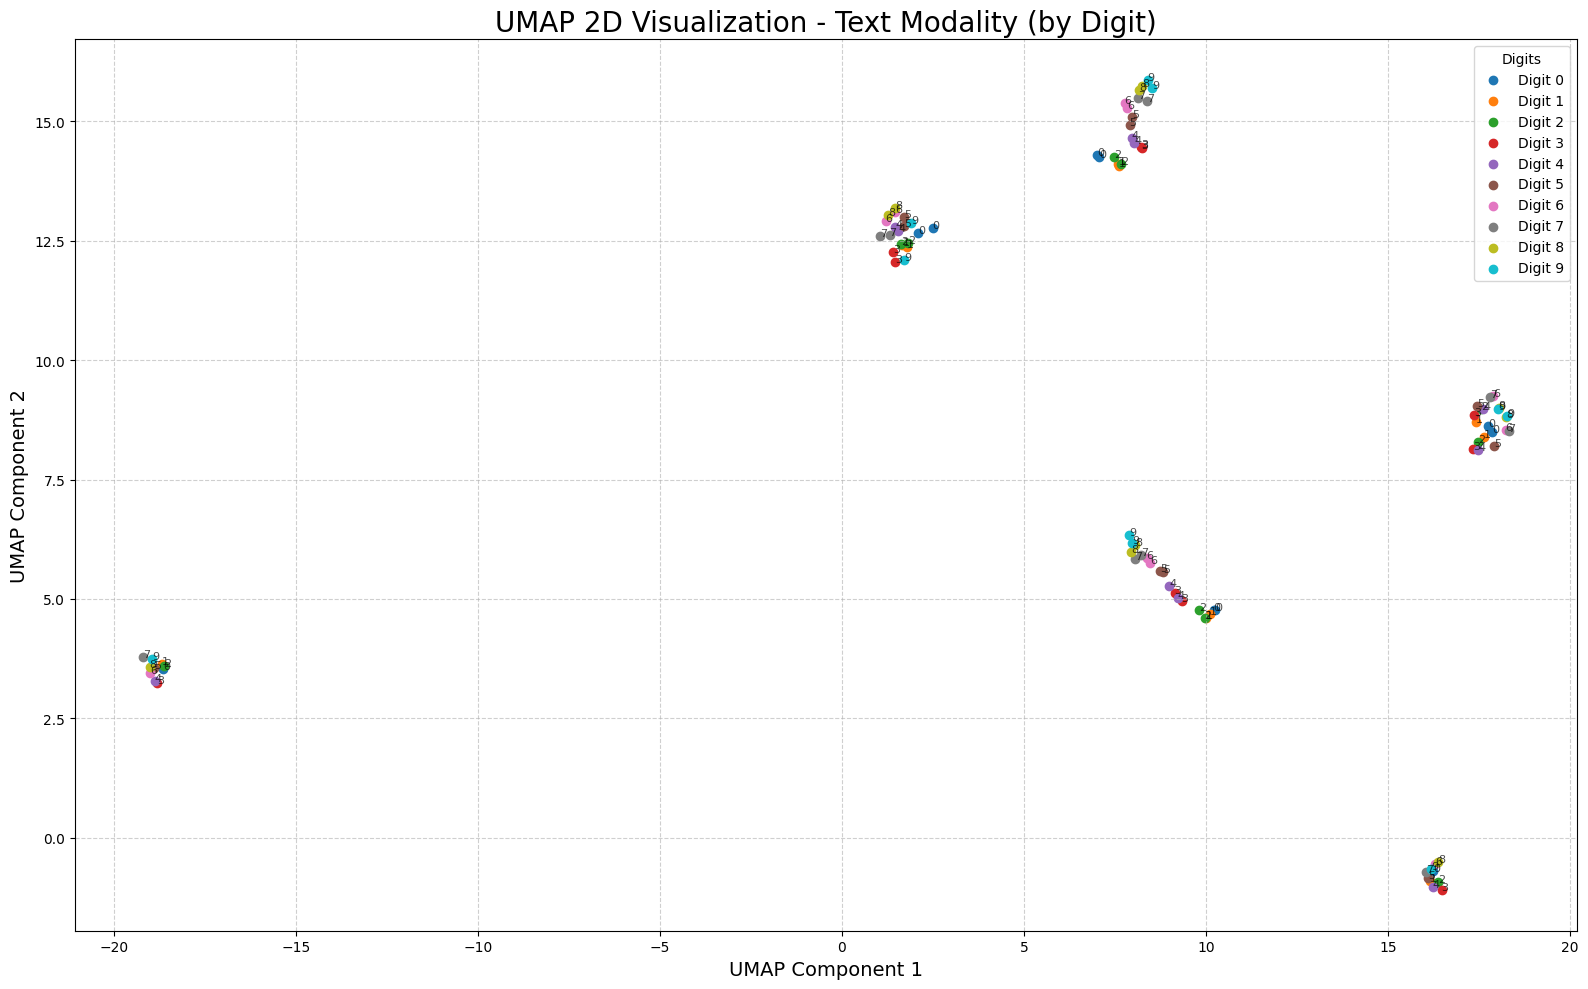

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


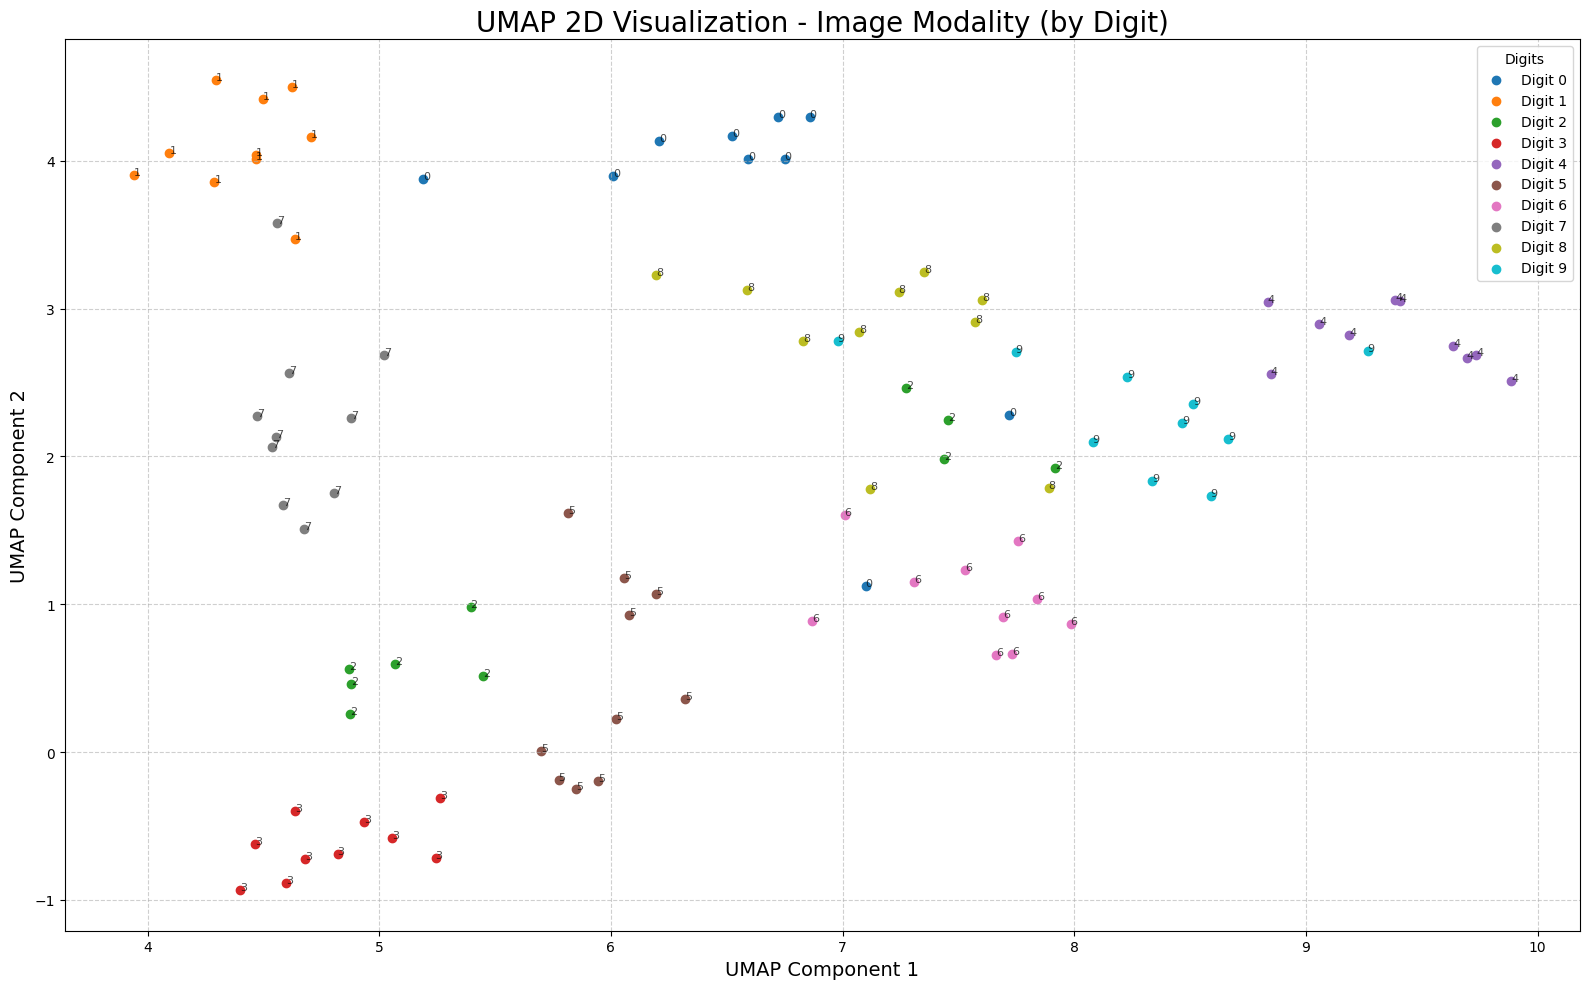

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


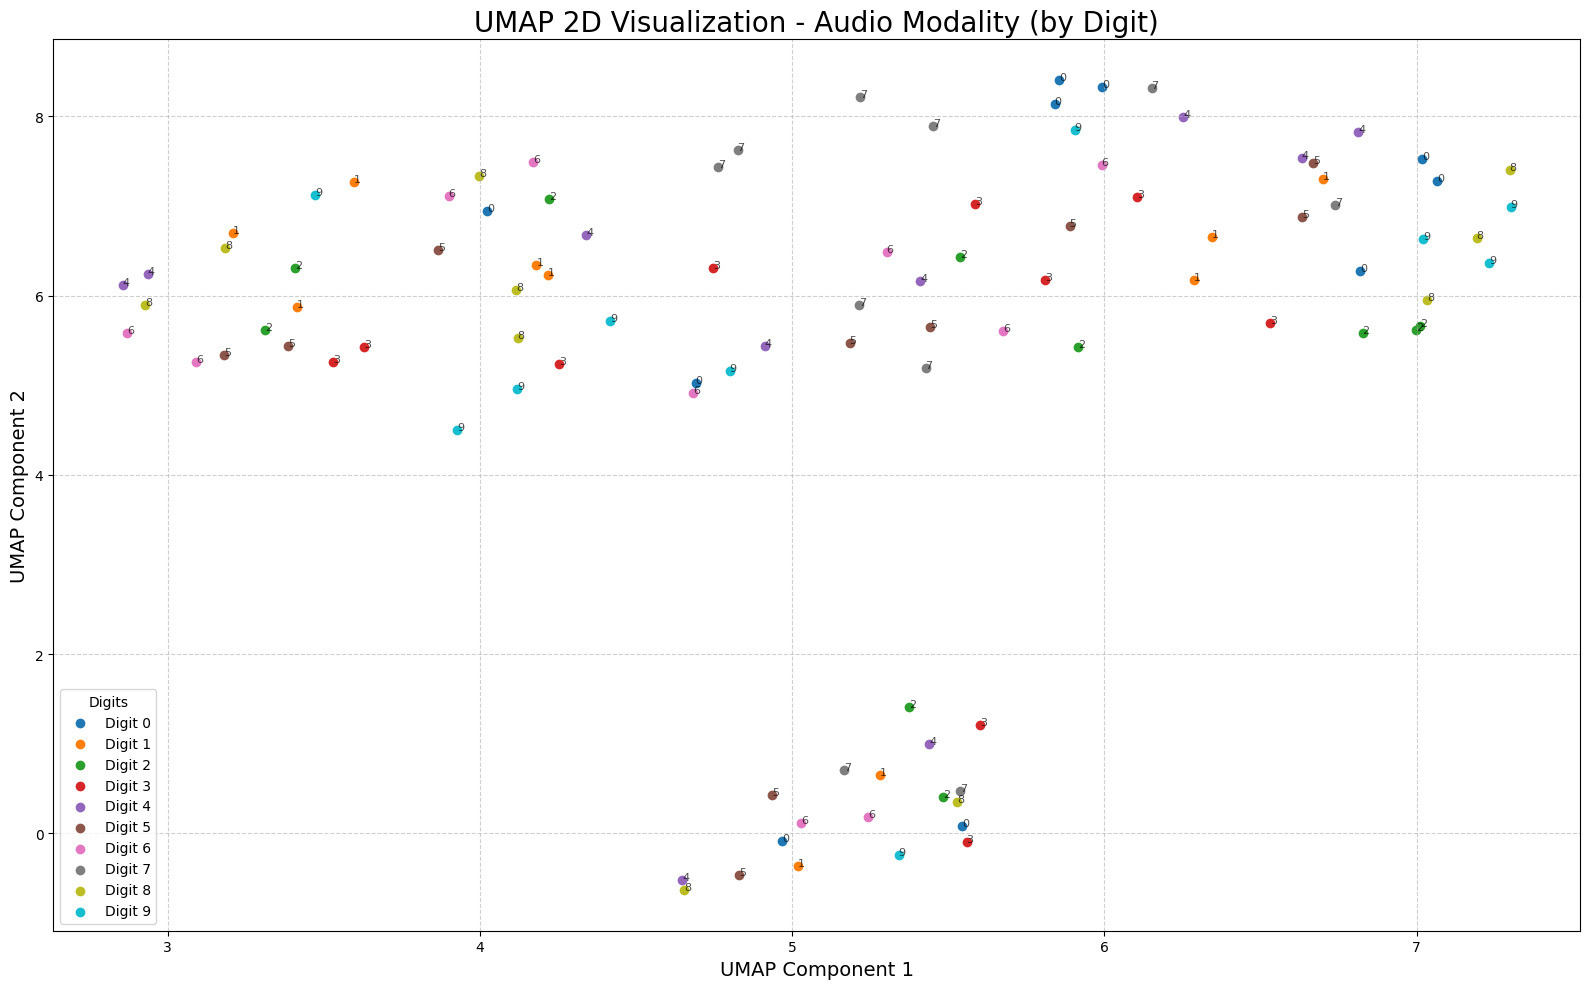

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import umap
import torch
from imagebind.models.imagebind_model import ModalityType

# Define a 10-level color palette for digits
digit_cmap = plt.get_cmap('tab10')

# --- UMAP Plots (by Modality) ---

# UMAP for Text Embeddings
X_text = embs[ModalityType.TEXT].cpu().numpy()
y_text = text_mnist_y[:_num_samples]
umap_text = umap.UMAP(random_state=0).fit_transform(X_text)

plt.figure(figsize=(16, 10))
plt.title("UMAP 2D Visualization - Text Modality (by Digit)", fontsize=20)
plt.xlabel("UMAP Component 1", fontsize=14)
plt.ylabel("UMAP Component 2", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
for digit_value in range(10):
    mask = np.array(y_text) == digit_value
    plt.scatter(umap_text[mask, 0], umap_text[mask, 1], color=digit_cmap(digit_value), label=f'Digit {digit_value}')
    for i, (x_coord, y_coord) in enumerate(umap_text[mask]):
        plt.annotate(str(digit_value), (x_coord, y_coord), fontsize=8, alpha=0.7)
plt.legend(fontsize=10, title="Digits")
plt.tight_layout()
plt.show()

# UMAP for Image Embeddings
X_image = embs[ModalityType.VISION].cpu().numpy()
y_image = image_mnist_y_sample[:_num_samples]
umap_image = umap.UMAP(random_state=0).fit_transform(X_image)

plt.figure(figsize=(16, 10))
plt.title("UMAP 2D Visualization - Image Modality (by Digit)", fontsize=20)
plt.xlabel("UMAP Component 1", fontsize=14)
plt.ylabel("UMAP Component 2", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
for digit_value in range(10):
    mask = np.array(y_image) == digit_value
    plt.scatter(umap_image[mask, 0], umap_image[mask, 1], color=digit_cmap(digit_value), label=f'Digit {digit_value}')
    for i, (x_coord, y_coord) in enumerate(umap_image[mask]):
        plt.annotate(str(digit_value), (x_coord, y_coord), fontsize=8, alpha=0.7)
plt.legend(fontsize=10, title="Digits")
plt.tight_layout()
plt.show()

# UMAP for Audio Embeddings
X_audio = embs[ModalityType.AUDIO].cpu().numpy()
y_audio = audio_mnist_y_sample[:_num_samples]
umap_audio = umap.UMAP(random_state=0).fit_transform(X_audio)

plt.figure(figsize=(16, 10))
plt.title("UMAP 2D Visualization - Audio Modality (by Digit)", fontsize=20)
plt.xlabel("UMAP Component 1", fontsize=14)
plt.ylabel("UMAP Component 2", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
for digit_value in range(10):
    mask = np.array(y_audio) == digit_value
    plt.scatter(umap_audio[mask, 0], umap_audio[mask, 1], color=digit_cmap(digit_value), label=f'Digit {digit_value}')
    for i, (x_coord, y_coord) in enumerate(umap_audio[mask]):
        plt.annotate(str(digit_value), (x_coord, y_coord), fontsize=8, alpha=0.7)
plt.legend(fontsize=10, title="Digits")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import umap
from imagebind.models.imagebind_model import ModalityType

# Assuming X, embs, _num_samples, text_mnist_y, image_mnist_y_sample, audio_mnist_y_sample are already defined
# and modality_labels, all_digit_labels_numeric, modality_colors_map, digit_cmap are prepared from previous cells.

# UMAP 2D
reducer = umap.UMAP(random_state=0)
umap_embeddings = reducer.fit_transform(X)

plt.figure(figsize=(16, 10))
plt.title("UMAP 2D Visualization (Scatter by Modality, Annotations by Digit)", fontsize=20)
plt.xlabel("UMAP Component 1", fontsize=14)
plt.ylabel("UMAP Component 2", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Plot and annotate each modality
for mod_idx, modality in enumerate(['text', 'image', 'audio']):
    mod_mask = np.array(modality_labels) == modality

    # Scatter points for this modality, colored by modality
    plt.scatter(umap_embeddings[mod_mask, 0], umap_embeddings[mod_mask, 1],
                color=modality_colors_map[modality],
                label=modality.capitalize(),
                alpha=0.6)

    # Annotate points with digit, colored by digit
    for i, idx in enumerate(np.where(mod_mask)[0]):
        digit_val = all_digit_labels_numeric[idx]
        plt.annotate(str(digit_val),
                     (umap_embeddings[idx, 0], umap_embeddings[idx, 1]),
                     fontsize=8,
                     color=digit_cmap(digit_val),
                     alpha=0.9)

plt.legend(fontsize=12, title="Modality")
plt.tight_layout()
plt.show()

In [ ]:
## MetaFeatures
### PyMFE

In [116]:
def digit_to_text_data(n: int) -> str:
    if not 0 <= n <= 9:
        raise ValueError("O número deve estar entre 0 e 9.")

    # formas por extenso
    words = ["zero","one","two","three","four","five","six","seven","eight","nine"]
    word = words[n]

    # possíveis formatos
    texts = [
        f"{n}",
        word,
        f"Number {n}",
        f"Number {word}",
        f"Digit {n}",
        f"Digit {word}",
        word.upper(),
        f"{n}",
        f"#{n}",
        f"0{n}",

    ]

    return texts
print(digit_to_text_data(0))

['0', 'zero', 'Number 0', 'Number zero', 'Digit 0', 'Digit zero', 'ZERO', '0', '#0', '00']
